In [1]:
import snowflake.connector


In [ ]:
import os, json
snowflake_credentials = json.load(open(os.environ['SNOWFLAKE_CREDENTIALS']))

In [59]:
ctx = snowflake.connector.connect(
    user=snowflake_credentials['user'],
    password=snowflake_credentials['password'],
    account=snowflake_credentials['account'],
    warehouse=snowflake_credentials['warehouse'],
    database=snowflake_credentials['database'],
    schema=snowflake_credentials['schema'],
    role=snowflake_credentials['role']
)

cur = ctx.cursor()

sql = 'select * from packing_reports'

cur.execute(sql)

df = cur.fetch_pandas_all()

In [52]:
df

,HARVEST_ID,SITE_ID,SITE_NAME,PEN_ID,PEN_NAME,REPORT_KEY,REPORT_SUBKEY,HOG_AVG_WEIGHT,NUMBER_OF_FISH,TOTAL_NET_WEIGHT
0,ALS03_20210419,96,Storelva,159,Pen 3,PR_202104_159_Storelva_3_ALS03_20210419,2021-04-19,4.396414,43198,189916.30
1,ALS05_20210409,96,Storelva,210,Pen 5,PR_20210409_210_Storelva_5,2021-04-12,4.628666,40665,188224.70
2,ALS06_20210423,96,Storelva,211,Pen 6,PR_202104_211_Storelva_6_ ALS06_20210423,2021-04-27,3.861332,32712,126311.90
3,BDR02_20210329,106,Drevflesa,220,Pen 2,PR_202103_220_Drevflesa_2_BDR02_20210329,2021-03-29,7.032525,35715,251166.62
4,BDR02_20210329,106,Drevflesa,220,Pen 2,PR_202103_220_Drevflesa_2_BDR02_20210329,2021-03-30,7.180583,25767,185022.08
5,BEL15_202101UNK,100,Eldviktaren,188,Pen 15,PR_202101_188_Eldviktaren_15,2021-02-01,3.865072,53270,205892.40
6,BEL15_202101UNK,100,Eldviktaren,188,Pen 15,PR_202101_188_Eldviktaren_15,2021-02-02,3.904462,53348,208295.26
7,BEL15_202101UNK,100,Eldviktaren,188,Pen 15,PR_202101_188_Eldviktaren_15,2021-02-03,3.859341,53262,205556.24
8,BEL15_202101UNK,100,Eldviktaren,188,Pen 15,PR_202101_188_Eldviktaren_15,2021-02-04,3.786825,12820,48547.10
9,BKJ03_20210206,23,Kjeppevikholmen,5,Pen 3,PR_202102_5_Kjeppevikholmen_3_BKJ03_20210206,2021-02-01,3.232338,64177,207441.77


In [11]:
harvest = df.iloc[0]

harvest

HARVEST_ID                                    ALS03_20210419
SITE_ID                                                   96
SITE_NAME                                           Storelva
PEN_ID                                                   159
PEN_NAME                                               Pen 3
REPORT_KEY           PR_202104_159_Storelva_3_ALS03_20210419
REPORT_SUBKEY                                     2021-04-19
HOG_AVG_WEIGHT                                       4.39641
NUMBER_OF_FISH                                         43198
TOTAL_NET_WEIGHT                                      189916
Name: 0, dtype: object

In [33]:
# sql = 'select * from packing_reports_weight_distribution where harvest_id = \'%s\'' % (harvest['HARVEST_ID'], )
sql = 'select * from prediction_reports'
print(sql)
cur.execute(sql)

df2 = cur.fetch_pandas_all()

select * from prediction_reports


In [34]:
df2

,HARVEST_ID,SITE_ID,SITE_NAME,PEN_ID,PEN_NAME,ROUND_AVG_WEIGHT,K_FACTOR,CV,STD_DEVIATION,SAMPLE_SIZE,LAST_FEEDING_DATE,UNDEPLOYMENT_DATE,HARVEST_DATE,SLAUGHTER_DATE
0,CO01_20210120,88,Oksøy,138,Pen 1,5355,1.4,21.2,1135.0126741488675,3351,2021-01-16,2021-01-18,2021-01-23,2021-01-23
1,GD02_20210115,90,Dale,144,Pen 2,8071,1.48,26,2100.8141497038596,3155,2021-01-10,2021-01-10,2021-01-15,2021-01-12
2,BEL15_202101UNK,100,Eldviktaren,188,Pen 15,4981,1.37,19.7,979.437845935399,4269,2021-01-25,2021-01-23,2021-01-29,2021-02-03
3,BS01_20210123,54,Silda,85,Pen 1,5669,1.39,21.4,1211.1821454919832,7022,2021-01-18,2021-01-22,2021-01-23,2021-01-23
4,BS01_20210123,54,Silda,85,Pen 1,5167,1.4,22.5,1164.0458265893365,277,2021-01-18,2021-01-22,2021-01-23,2021-01-23
5,BS02_20210123,54,Silda,86,Pen 2,5231,1.34,24.7,1291.5475286463095,1863,2021-01-18,2021-01-22,2021-01-23,2021-01-23
6,GD03_202102UNK,90,Dale,145,Pen 3,7748,1.5,21.7,1680.4469935068453,3169,2021-02-22,2021-02-23,2021-02-24,2021-02-25
7,BKJ03_20210206,23,Kjeppevikholmen,5,Pen 3,4125,1.26,19.3,798.0504396684452,5098,2021-01-27,2021-01-30,2021-01-30,2021-01-30
8,BDR02_20210329,106,Drevflesa,220,Pen 2,7788,1.39,20.1,1566.0408756872732,3137,2021-03-23,2021-03-25,2021-03-29,2021-03-29
9,KMO9_20210325,60,Movikodden N,229,Pen 9,4748,1.29,21.6,1026.1829078661706,3898,2021-03-15,2021-03-18,2021-03-25,2021-03-29


In [118]:
sql = '''
    select * from packing_reports left outer join 
    prediction_reports on (packing_reports.harvest_id = prediction_reports.harvest_id) 
    where prediction_reports.harvest_id is not null and prediction_reports.harvest_id <> 'BS01_20210123'
    order by SLAUGHTER_DATE asc
'''

print(sql)

cur.execute(sql)

vals = []

for row in cur:
    vals.append(row)
    
cols = ['pHARVEST_ID','pSITE_ID','pSITE_NAME','pPEN_ID','pPEN_NAME','pREPORT_KEY','pREPORT_SUBKEY','pHOG_AVG_WEIGHT','pNUMBER_OF_FISH','pTOTAL_NET_WEIGHT','HARVEST_ID','SITE_ID','SITE_NAME','PEN_ID','PEN_NAME','ROUND_AVG_WEIGHT','K_FACTOR','CV','STD_DEVIATION','SAMPLE_SIZE','LAST_FEEDING_DATE','UNDEPLOYMENT_DATE','HARVEST_DATE','SLAUGHTER_DATE']


    select * from packing_reports left outer join 
    prediction_reports on (packing_reports.harvest_id = prediction_reports.harvest_id) 
    where prediction_reports.harvest_id is not null and prediction_reports.harvest_id <> 'BS01_20210123'
    order by SLAUGHTER_DATE asc



In [129]:
df = pd.DataFrame(vals, columns = cols)

df = df.astype({'ROUND_AVG_WEIGHT': 'int64', 'K_FACTOR': 'float64', 'CV': 'float64', 'STD_DEVIATION': 'float64', 'SAMPLE_SIZE': 'int64'})

In [131]:
import pandas as pd
import numpy as np

diffs = []

harvest_ids = list(df['HARVEST_ID'])
harvest_ids = sorted(set(harvest_ids), key=harvest_ids.index)

for harvest_id in harvest_ids:
    df2 = df[df.HARVEST_ID == harvest_id]
    avg_weight_packing = np.round(sum(df2['pTOTAL_NET_WEIGHT']) / sum(df2['pNUMBER_OF_FISH']) * 1000)
    avg_weight_prediction = np.mean(df2['ROUND_AVG_WEIGHT'])
    gut_loss = 0.16
    avg_gutted_prediction = avg_weight_prediction * (1 - gut_loss)
    
    diff = (avg_gutted_prediction - avg_weight_packing) / avg_weight_packing
    diffs.append(diff)
    
    print('%s (%s): %i vs %i, %0.2f%%' % (harvest_id, df2['SLAUGHTER_DATE'].iloc[0], avg_weight_packing, avg_gutted_prediction, diff * 100))

GD02_20210115 (2021-01-12): 6177 vs 6779, 9.76%
CO01_20210120 (2021-01-23): 4493 vs 4498, 0.12%
BS02_20210123 (2021-01-23): 4481 vs 4394, -1.94%
BKJ03_20210206 (2021-01-30): 3233 vs 3465, 7.18%
BEL15_202101UNK (2021-02-03): 3870 vs 4184, 8.11%
GD03_202102UNK (2021-02-25): 6928 vs 6508, -6.06%
KMO9_20210325 (2021-03-29): 4045 vs 3988, -1.40%
BDR02_20210329 (2021-03-29): 7095 vs 6541, -7.80%
ALS05_20210409 (2021-04-12): 4629 vs 4778, 3.24%
ALS03_20210419 (2021-04-19): 4396 vs 4709, 7.14%
ALS06_20210423 (2021-04-26): 3846 vs 3818, -0.71%


<BarContainer object of 11 artists>

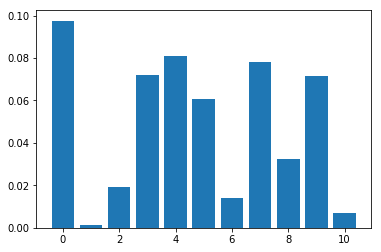

In [136]:
import matplotlib.pyplot as plt

plt.bar(range(len(diffs)), np.abs(diffs))

In [ ]:
## TODO: Report this for distribution error